In [1]:
import requests as rq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from nltk.metrics.distance import jaccard_distance

### Part 1. Define function for querying datamuse.

In [2]:

def query_datamuse(word, n=100):
    query = "https://api.datamuse.com/words?ml={}&max={}".format(word, n)
    response = rq.get(query)
    results = []
    for obj in response.json(): 
        results.append(obj["word"])
    return results

In [3]:
#Load datasets 
mc = pd.read_csv("data/mc.csv", header=0, names=["word1", "word2", "score"], sep=";")
rg = pd.read_csv("data/rg.csv", header=0, names=["word1", "word2", "score"], sep=";")
wordsim = pd.read_csv("data/wordsim.csv", header=0, names=["word1", "word2", "score"], sep=";")

### Part 2. Define functions for calculating jaccard similarity from dataset.

In [4]:
def jaccard_similarity(set1, set2): 
    return 1 - jaccard_distance(set1, set2)

def datamuse_similarity(X, Y, n=100):
    words1 = query_datamuse(X, n=n)
    words2 = query_datamuse(Y, n=n)    
    return jaccard_similarity(set(words1), set(words2))

def calculate_similarities(df, n): 
    words1 = df["word1"].tolist()
    words2 = df["word2"].tolist()
    scores = df["score"].tolist()

    sim_values = []
    for w1, w2 in zip(words1, words2): 
        sim_values.append(datamuse_similarity(w1, w2, n=n))
        
    p = stats.pearsonr(sim_values, scores)
    return p



In [5]:
calculate_similarities(mc, 100)

PearsonRResult(statistic=0.619798204105011, pvalue=0.0003360473903788395)

### Find the N with highest Pearson correlation coefficient score.

In [6]:
def find_best_n(df): 
    d = {
        "n": [],
        "statistics": [],
        "pvalues": []
    }
    stats = []
    pvals = []
    for n in range(100, 1000, 100): 
        print("N: {}".format(n))
        p = calculate_similarities(mc, n)
        d["n"].append(n)
        d["statistics"].append(p.statistic)
        d["pvalues"].append(p.pvalue)
    
    return d

d = find_best_n(mc)
df = pd.DataFrame.from_dict(d)

N: 100
N: 200
N: 300
N: 400
N: 500
N: 600
N: 700
N: 800
N: 900


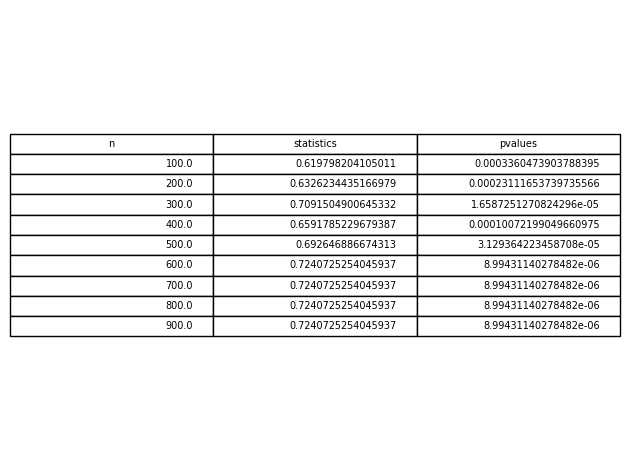

In [7]:
fig, ax = plt.subplots()

fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.table(cellText=df.values, colLabels=df.columns, loc='center')
fig.tight_layout()
plt.show()

In [8]:
# Get the N value with highest Pearson correlation coefficient score
max_id = df['statistics'].idxmax()
N = int(df.iloc[max_id]["n"])
print(N)

600


### Calculate correlation coefficients for all datasets.

In [9]:
p_mc = calculate_similarities(mc, N)
p_rg = calculate_similarities(rg, N)
p_wordsim = calculate_similarities(wordsim, N)
print(p_mc)
print(p_rg)
print(p_wordsim)

PearsonRResult(statistic=0.7240725254045937, pvalue=8.99431140278482e-06)
PearsonRResult(statistic=0.7850157130429561, pvalue=1.6236618035026146e-14)
PearsonRResult(statistic=0.49022656405755977, pvalue=1.1105676505688641e-22)


# Part 3 - Apply the method in part 2 on sentence level

In [62]:
# get sentence bag of similartities words

def get_bag_of_words(sentence, n = 100):
    if N == 0 or N == 1:
        return set(sentence.split(" "))
    words = sentence.split(" ")
    bag = set(words)
    for word in words: 
        bag = bag.union(set(query_datamuse(word, n=n)))
    return bag

def get_sentence_similarity(sentence1, sentence2, n = 100):
    bag1 = get_bag_of_words(sentence1,n)
    bag2 = get_bag_of_words(sentence2,n)
    return jaccard_similarity(bag1, bag2)

# Part 4

In [63]:
sentence_pairs_list = [
    ["Today is quite hot for a winter.", "Never is warm in winter."],
    ["The car is running fast but has some troubles recently.", "Toyota cars are recalled for a fault."],
    ["The teacher cannot do it again and never again.", "Teacher has been prohibited from this task."]
]

In [68]:
results = []
d = {
    "sentence1": [],
    "sentence2": [],
    "similarity": [],
    "N": [],
}
for pair in sentence_pairs_list:
    for n in range(0, 1000,50):
        results.append(get_sentence_similarity(pair[0], pair[1],n))
        d["sentence1"].append(pair[0])
        d["sentence2"].append(pair[1])
        d["similarity"].append(results[-1])
        d["N"].append(n)


df = pd.DataFrame.from_dict(d)
df



,sentence1,sentence2,similarity,N
0,Today is quite hot for a winter.,Never is warm in winter.,0.200000,0
1,Today is quite hot for a winter.,Never is warm in winter.,0.148315,50
2,Today is quite hot for a winter.,Never is warm in winter.,0.181604,100
3,Today is quite hot for a winter.,Never is warm in winter.,0.178427,150
4,Today is quite hot for a winter.,Never is warm in winter.,0.151097,200
5,Today is quite hot for a winter.,Never is warm in winter.,0.141098,250
6,Today is quite hot for a winter.,Never is warm in winter.,0.131220,300
7,Today is quite hot for a winter.,Never is warm in winter.,0.124082,350
8,Today is quite hot for a winter.,Never is warm in winter.,0.118808,400
9,Today is quite hot for a winter.,Never is warm in winter.,0.119307,450


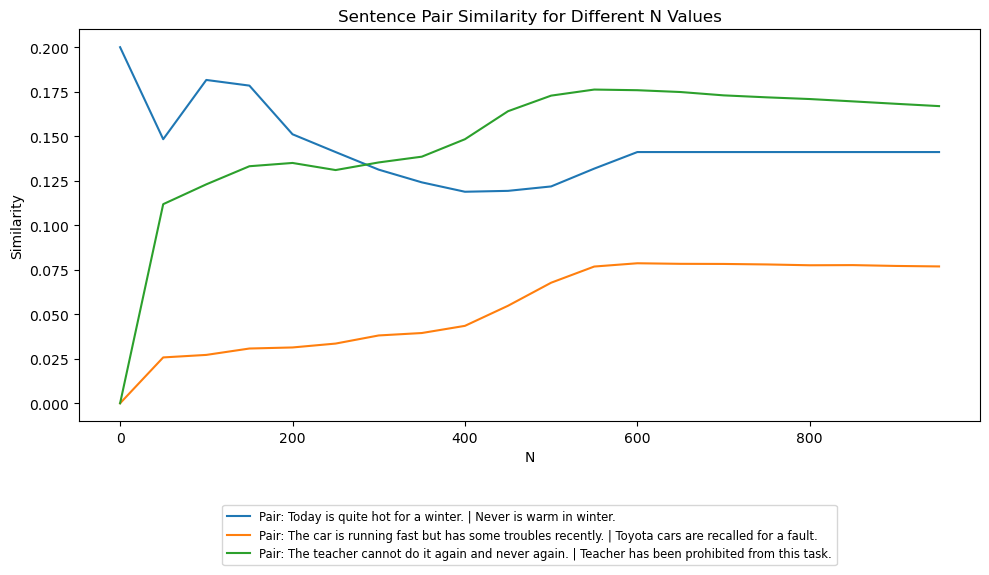

In [78]:
fig, ax = plt.subplots(figsize=(10, 6))  # You can adjust the figure size as needed

# Loop through sentence pairs and plot the similarity scores for each pair
for pair in sentence_pairs_list:
    # Filter for rows related to the current sentence pair
    df_pair = df[(df["sentence1"] == pair[0]) & (df["sentence2"] == pair[1])]
    
    # Plot the similarity for this sentence pair
    ax.plot(df_pair["N"], df_pair["similarity"], label=f"Pair: {pair[0]} | {pair[1]}")

# Adding labels and title
ax.set_xlabel('N')
ax.set_ylabel('Similarity')
plt.title('Sentence Pair Similarity for Different N Values')

# Moving the legend below the entire chart
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=1, fontsize='small')

# Adjust layout to ensure everything fits without overlap
plt.tight_layout()

# Show the plot
plt.show()


# Part 5

In [13]:
import time

# Load the STSS-131 dataset
stss = pd.read_csv("data/STSS-131.tsv", header=0, names=["sent1", "sent2", "score", "score2"], sep="\t")
stss["datamuse_similarity"] = np.nan

# Load half-completed data
from pathlib import Path
if (Path("data")  / "STSS-131-datamuse.tsv").is_file():
    stss = pd.read_csv("data/STSS-131-datamuse.tsv", sep="\t")

# Use this due to performance issues
N = 200

try:
    for i, row in stss.iterrows(): 
        print("Processing row {}".format(i))
        
        # skip if already calculated
        if not np.isnan(stss.at[i, "datamuse_similarity"]):
            print("Skipping row {}".format(i))
            continue

        stss.at[i, "datamuse_similarity"] = get_sentence_similarity(row["sent1"], row["sent2"])
        time.sleep(1)
except Exception as e:
    print(e)
finally:
    # Because of timeouts, save the results to a file
    stss.to_csv("data/STSS-131-datamuse.tsv", sep="\t", index=False)

stss.head()

stss_p = stats.pearsonr(stss["datamuse_similarity"], stss["score"])
print("Pearson correlation coefficient: {} p-value: {}".format(stss_p[0], stss_p[1]))

Processing row 0
Skipping row 0
Processing row 1
Skipping row 1
Processing row 2
Skipping row 2
Processing row 3
Skipping row 3
Processing row 4
Skipping row 4
Processing row 5
Skipping row 5
Processing row 6
Skipping row 6
Processing row 7
Skipping row 7
Processing row 8
Skipping row 8
Processing row 9
Skipping row 9
Processing row 10
Skipping row 10
Processing row 11
Skipping row 11
Processing row 12
Skipping row 12
Processing row 13
Skipping row 13
Processing row 14
Skipping row 14
Processing row 15
Skipping row 15
Processing row 16
Skipping row 16
Processing row 17
Skipping row 17
Processing row 18
Skipping row 18
Processing row 19
Skipping row 19
Processing row 20
Skipping row 20
Processing row 21
Skipping row 21
Processing row 22
Skipping row 22
Processing row 23
Skipping row 23
Processing row 24
Skipping row 24
Processing row 25
Skipping row 25
Processing row 26
Skipping row 26
Processing row 27
Skipping row 27
Processing row 28
Skipping row 28
Processing row 29
Skipping row 29


# Part 6

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vectorizer = TfidfVectorizer()
tf_idf_matrix = vectorizer.fit_transform(stss["sent1"], stss["sent2"])

cosine_similarities = []
for i in range(len(stss)):
    sent1_vector = vectorizer.transform([stss["sent1"][i]])
    sent2_vector = vectorizer.transform([stss["sent2"][i]])
    cosine_similarities.append(cosine_similarity(sent1_vector, sent2_vector)[0][0])

tfidf_p = stats.pearsonr(cosine_similarities, stss["score"])
print("Pearson correlation coefficient: {} p-value: {}".format(tfidf_p[0], tfidf_p[1]))

Pearson correlation coefficient: 0.776216151106484 p-value: 2.051627414067027e-27


# Part 7

In [145]:
import nltk
import numpy as np
from nltk.corpus import genesis
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('genesis')

genesis_ic = wn.ic(genesis, False, 0.0)
def word_similarity_overall(word1,word2, data = 'WordNet', path = 'wup',mode ="max"):
    if data == 'WordNet':
        synset_extract = wn.synsets
        def wup_sim(s1,s2):
            try:
                return s1.wup_similarity(s2)
            except Exception as e:
                return 0
        def res_sim(s1,s2):
            try:
                if s1.res_similarity(s2, genesis_ic) > 1000:
                    return 0
                return s1.res_similarity(s2, genesis_ic)
            except Exception as e:
                return 0
        if path == 'wup':
            sim_fun = wup_sim
        if path == "res":
            sim_fun = res_sim
    else:
        synset_extract = yago_sim.word2yago
        sim_fun = lambda s1,s2: yago_sim.yago_similarity(s1,s2,path)
    synsets1 = synset_extract(word1)
    synsets2 = synset_extract(word2)
    if not synsets1 or not synsets2:
        return 0
    
    if mode == "max":
        return max(
            (sim_fun(s1, s2) or 0) for s1 in synsets1 for s2 in synsets2
        )
    elif mode == "min":
        return min(
            (sim_fun(s1, s2) or 0) for s1 in synsets1 for s2 in synsets2
        )
    elif mode == "first":
        return sim_fun(synsets1[0], synsets2[0])
        
    elif mode == "avg":
        similarities = [sim_fun(s1, s2) for s1 in synsets1 for s2 in synsets2]
        return np.mean(similarities)
    else:
        raise ValueError("Invalid mode. Choose 'max', 'min', 'first', or 'avg'.")
    
word_similarity_overall("dog","cat",data = 'WordNet', path = 'wup',mode ="max")
    

def preProcess(sentence):
    """Tokenize, remove stopwords, and clean the sentence."""
    Stopwords = list(set(nltk.corpus.stopwords.words('english')))
    words = word_tokenize(sentence)
    words = [word.lower() for word in words if word.isalpha() and word not in Stopwords] 
    return words

def Sentence_Similarity(T1, T2, data = 'WordNet', path = 'wup',mode ="max"):
    """Calculate sentence-to-sentence similarity using TF-IDF and WordNet similarity."""
    words1 = preProcess(T1)
    words2 = preProcess(T2)

    tf = TfidfVectorizer(use_idf=True)
    tf.fit_transform([' '.join(words1), ' '.join(words2)])
    
    Idf = dict(zip(tf.get_feature_names_out(), tf.idf_))
    
    Sim_score1 = 0
    Sim_score2 = 0
    sim_func = lambda w1, w2: word_similarity_overall(w1, w2, data, path, mode)
    for w1 in words1:
        Max = 0
        for w2 in words2:
            score = sim_func(w1, w2)
            if Max < score:
                Max = score
        Sim_score1 += Max * Idf.get(w1, 0)
    Sim_score1 /= sum([Idf.get(w1, 0) for w1 in words1])

    for w2 in words2:
        Max = 0
        for w1 in words1:
            score = sim_func(w1, w2)
            if Max < score:
                Max = score
        Sim_score2 += Max * Idf.get(w2, 0)
    Sim_score2 /= sum([Idf.get(w2, 0) for w2 in words2])

    Sim = (Sim_score1 + Sim_score2) / 2
    
    return round(Sim, 2)

T1 = 'Students feel unhappy today about the class of 2020'
T2 = 'Many students struggled to understand some key concepts about the subject seen in the class of 2020'
print('Wup Similarity(T1, T2) =', Sentence_Similarity(T1, T2, 'WordNet', 'wup', 'max'))
# print('Resnik Similarity(T1, T2) =', Similarity(T1, T2, 1))



[nltk_data] Downloading package stopwords to /Users/anvu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/anvu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/anvu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package genesis to /Users/anvu/nltk_data...
[nltk_data]   Package genesis is already up-to-date!


Wup Similarity(T1, T2) = 0.71


In [151]:
import os
from tqdm.notebook import tqdm
 
result_path = 'data/STSS-131-result.tsv'
datas = ["WordNet","Yago"]
paths = ["wup","res"]
modes = ["max","min","first","avg"]

combinations = {f"{data}_{path}_{mode}":(data,path,mode) for data in datas for path in paths for mode in modes}

if not os.path.exists(result_path):
    stss = pd.read_csv("data/STSS-131.tsv", names = ["Sent1","Sent2","Human_sim_score","var"],sep="\t")
    for key in combinations:
        stss[key] = np.nan
    stss.to_csv(result_path, sep="\t",index = False)

stss_result = pd.read_csv(result_path,sep="\t")

for i in tqdm(range(len(stss_result))):
    for key in combinations:
        data,path,mode = combinations[key]
        if np.isnan(stss_result.at[i, key]):
            stss_result.at[i, key] = Sentence_Similarity(stss_result["Sent1"][i],stss_result["Sent2"][i],data,path,mode)

stss["WordNet_similarity"] = np.nan

  0%|          | 0/131 [00:00<?, ?it/s]

In [152]:
# get the correlation between the human similarity score and the calculated similarity score
results = []
for key in combinations:
    p = stats.pearsonr(stss[key],stss["Human_sim_score"])
    print(f"Correlation between {key} and Human_sim_score: {p[0]} p-value: {p[1]}")
    results.append((key,p[0],p[1]))

# give me a table of all results


Correlation between WordNet_wup_max and Human_sim_score: 0.5580747529329937 p-value: 4.355185783554648e-12
Correlation between WordNet_wup_min and Human_sim_score: 0.14627700332734084 p-value: 0.09548440218091162
Correlation between WordNet_wup_first and Human_sim_score: 0.5674357950674075 p-value: 1.5854919046128638e-12
Correlation between WordNet_wup_avg and Human_sim_score: 0.29000014027448023 p-value: 0.0007797194890016165
Correlation between WordNet_res_max and Human_sim_score: 0.6454070349618785 p-value: 8.68292190277459e-17
Correlation between WordNet_res_min and Human_sim_score: 0.2034302966873703 p-value: 0.019781052986239913
Correlation between WordNet_res_first and Human_sim_score: 0.6383908986470558 p-value: 2.3571704076938364e-16
Correlation between WordNet_res_avg and Human_sim_score: 0.33768401809038306 p-value: 7.998795677074886e-05
Correlation between Yago_wup_max and Human_sim_score: 0.2929624598778653 p-value: 0.0006842942426564147
Correlation between Yago_wup_min an